# Лабораторная работа
## по курсу "Моделирование нелинейных сложных систем"
## студента группы ПК-16М-1
## Бекленищева Владислава

### Задание 1
#### Условие
Дана система:
\begin{cases}
 \dot N_1(t) = -N_1(t)N_2(t), \\
 \dot N_2(t) = -\alpha N_2(t)(1 - N_1(t)),(1) \\
 \dot N_3(t) = \alpha N_2(t).
\end{cases}
Здесь $ N_1(t) $ – доля населения, восприимчивая к заражению данным вирусом;
$ N_2(t) $ – степень зараженности населения на данный момент; $N_3(t)$ – мера
невосприимчивости к данному вирусу (иммунитет); $\alpha$ – положительный параметр. Число людей, которые заражаются повторно, пропорционально вели-
чине $N_1(t) N_2(t)$.
Задачи:
1. Найти положения равновесия системы (1).
2. Исследовать на устойчивость положения равновесия системы (1).
3. Построить фазовые портреты системы (1) для разных начальных условий.
4. Установить бифуркационные значения параметра $\alpha$ для $N_2(t)$ и $N_3(t)$.

#### Решение задачи 1

In [32]:
%matplotlib notebook
from numpy import *
import pylab as p
from scipy.integrate import odeint

# Definition of parameters

def dN_dt(N, t=0):
    return array([ -N[0]*N[1],
                  -alpha*N[1]*(1 - N[0]),
                  alpha*N[1]
                 ])

In [172]:
alpha = 1
N_f1 = array([1.05, 0.002, 5])
result = dN_dt(N_f1)
result

array([-0.0021,  0.0001,  0.002 ])

In [3]:
def jacobian(N, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[-N[1],      -N[0],           0],
                  [ alpha*N[1], alpha*(N[0]-1), 0],
                  [ 0,          alpha,          0]
                 ])

In [173]:
A_f1 = jacobian(N_f1)
A_f1

array([[-0.002, -1.05 ,  0.   ],
       [ 0.002,  0.05 ,  0.   ],
       [ 0.   ,  1.   ,  0.   ]])

Получаем устойчивый фокус:

In [174]:
lambda1, lambda2, lambda3 = linalg.eigvals(A_f1)
lambda1, lambda2, lambda3

(0j,
 (0.024000000000000021+0.037735924528226397j),
 (0.024000000000000021-0.037735924528226397j))

In [206]:
t = arange(0, 2.5, 0.01)
X0 = array([20, 5, 4])  
X, infodict = odeint(dN_dt, X0, t, full_output=True)
infodict['message']

'Integration successful.'

<IPython.core.display.Javascript object>


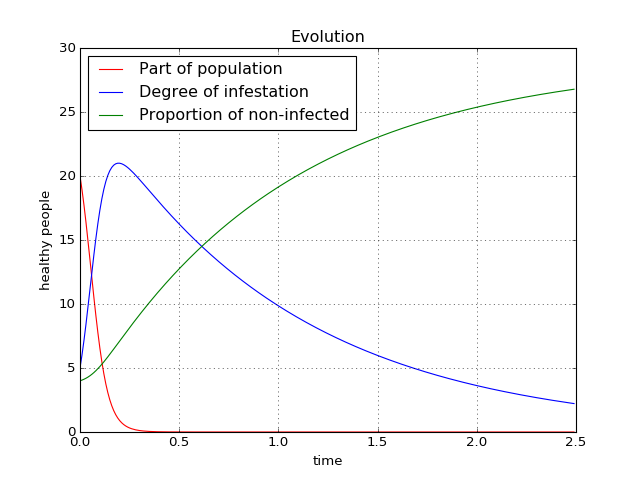

In [207]:
#!python
people, degree_of_infestation, measure_of_susceptibility  = X.T
f1 = p.figure()
p.plot(t, people, 'r-', label='Part of population')
p.plot(t, degree_of_infestation  , 'b-', label='Degree of infestation')
p.plot(t, measure_of_susceptibility  , 'g-', label='Proportion of non-infected')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('healthy people')
p.title('Evolution')
p.show()

Построим фазовый портрет. Для начала зададим значения и цвет траекторий:

In [192]:
values  = linspace(0.0, 10.0, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

Построим траектории:

In [213]:
def calcODE(args, y0, dy0, ts = 10, nt = 101):
    y0 = [y0, dy0]
    t = linspace(0, ts, nt)
    sol = odeint(dN_dt, y0, t)
    return sol

def drawPhasePortrait(args, deltaX = 1, deltaDX = 1, startX = 0,  stopX = 5, startDX = 0, stopDX = 5, ts = 10, nt = 101):
    for y0 in range(startX, stopX, deltaX):
            for dy0 in range(startDX, stopDX, deltaDX):
                sol = calcODE(args, y0, dy0, ts, nt)
                plt.plot(sol[:, 0], sol[:, 1], 'b')
    plt.xlabel('x')
    plt.ylabel('dx/dt')
    plt.grid()
    plt.show()

In [214]:
drawPhasePortrait(N_f1)

RuntimeError: The size of the array returned by func (3) does not match the size of y0 (2).